<a href="https://colab.research.google.com/github/kirstenpamaran/ISYS2001_Assignment/blob/main/ISYS2001_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Uncomment if you don't have the necessary libraries installed 

In [59]:
# !pip3 install pandas matplotlib

In [60]:
import sqlite3 
import pandas as pd
import matplotlib.pyplot as plt
import re

## IMPORT DATABASE FILE INTO PROJECT DIRECTORY




In [61]:
# I downloaded the data from the assignment instruction document

!wget -O enron.db https://curtin-my.sharepoint.com/:u:/g/personal/211934g_curtin_edu_au/EaYagsqa2r1Bi5wtHbswGFwBH2kd2uTnz6rlka7GI36GUQ?download=1
!wget -O extract.db https://curtin-my.sharepoint.com/:u:/g/personal/211934g_curtin_edu_au/EbNeFqkc_g1EmQZzAKqc_w8BYeUTUVyexiSsmDbZb1EqAQ?download=1


--2023-05-26 11:00:31--  https://curtin-my.sharepoint.com/:u:/g/personal/211934g_curtin_edu_au/EaYagsqa2r1Bi5wtHbswGFwBH2kd2uTnz6rlka7GI36GUQ?download=1
Resolving curtin-my.sharepoint.com (curtin-my.sharepoint.com)... 13.107.136.8, 13.107.138.8, 2620:1ec:8f8::8, ...
Connecting to curtin-my.sharepoint.com (curtin-my.sharepoint.com)|13.107.136.8|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /personal/211934g_curtin_edu_au/Documents/Teaching/ISYS2001/ISYS2001-Assignment-2-Data/enron_sqlite3.db?ga=1 [following]
--2023-05-26 11:00:32--  https://curtin-my.sharepoint.com/personal/211934g_curtin_edu_au/Documents/Teaching/ISYS2001/ISYS2001-Assignment-2-Data/enron_sqlite3.db?ga=1
Reusing existing connection to curtin-my.sharepoint.com:443.
HTTP request sent, awaiting response... 200 OK
Length: 853819392 (814M) [application/octet-stream]
Saving to: ‘enron.db’

enron.db            100%[===================>] 814.27M  32.9MB/s    in 31s     

2023-05-26 11:01:04 (25.

## LOAD DATABASE

In [62]:
# I conected to the database
# con is a a sqlite3 object created by connecting to the sqlite3 database
# and load the file 'enron.db' we need to use the cursor object by calling cursor()
# function from our database connection object named 'con'

con = sqlite3.connect('enron.db')
# I created variable 'cursor' that can execute our sql commands
cur = con.cursor()

## RETRIEVE DATABASE DATA BY RETRIEVING ALL TABLES


*   Print table names in eron.db

Get the list of tabled named:


*   employeelist
*   message
*   recepientinfo
*   referenceinfo

In [72]:
# I loaded a table
# execute() takes in a string argument of a SQL command
# by default, tables names are stored in a table caleed 'sqlite_master'
# use SELECT keyword to retrieve each name of the tables that are a type 
# of 'table' from sqlite_master table  

SQL ='''
SELECT name FROM sqlite_master WHERE type='table';
'''
cur.execute(SQL)

# call fetchall() and store the query in a list we named query_rows
query_rows = cur.fetchall()

# tables holds the names of the tables
table_names = []
for i in rows: 
  table_names.append(i[0])

# print the names of the tables
  print(i[0])

employeelist
message
recipientinfo
referenceinfo


## UNCOVER DATA OF EACH TABLE





In [73]:
# Contain each dataframe in a dictionary so we can 
# access them later via table name

df_list = {}
for table in table_names:
  df = pd.read_sql_query("SELECT * FROM " + table, con)
  df_list[table] = df

*Employee List Data*

In [74]:
# An easier way to load a table

employee_df = df_list['employeelist']
employee_df.head()

,eid,firstName,lastName,Email_id,Email2,Email3,EMail4,folder,status
0,1,Robert,Badeer,robert.badeer@enron.com,rbadeer@enron.com,,,badeer-r,Director
1,2,Kevin,Hyatt,kevin.hyatt@enron.com,kevin_hyatt@enron.com,khyatt@enron.com,,hyatt-k,Director
2,3,Tracy,Geaccone,tracy.geaccone@enron.com,tracy_geaconne@enron.com,,,geaccone-t,Employee
3,4,Teb,Lokey,teb.lokey@enron.com,teb_lokey@enron.com,tlokey@enron.com,,lokey-t,Manager
4,5,Richard,Ring,richard.ring@enron.com,,,,ring-r,Employee


*Message Table*

In [75]:
message_df = df_list['message']
message_df.head()

,mid,sender,date,message_id,subject,body,folder
0,52,press.release@enron.com,2000-01-21 04:51:00,<12435833.1075863606729.JavaMail.evans@thyme>,ENRON HOSTS ANNUAL ANALYST CONFERENCE PROVIDES...,HOUSTON - Enron Corp. hosted its annual equity...,Robert_Badeer_Aug2000Notes FoldersPress releases
1,53,office.chairman@enron.com,2000-01-24 01:37:00,<29664079.1075863606676.JavaMail.evans@thyme>,Over $50 -- You made it happen!,"On Wall Street, people are talking about Enron...",Robert_Badeer_Aug2000Notes FoldersPress releases
2,54,office.chairman@enron.com,2000-01-24 02:06:00,<15300605.1075863606629.JavaMail.evans@thyme>,Over $50 -- You made it happen!,"On Wall Street, people are talking about Enron...",Robert_Badeer_Aug2000Notes FoldersPress releases
3,55,press.release@enron.com,2000-02-02 10:21:00,<10522232.1075863606538.JavaMail.evans@thyme>,ROAD-SHOW.COM Q4i.COM CHOOSE ENRON TO DELIVER ...,"HOUSTON =01) Enron Broadband Services (EBS), a...",Robert_Badeer_Aug2000Notes FoldersPress releases
4,56,office.chairman@enron.com,2000-02-07 22:16:00,<16056123.1075863606515.JavaMail.evans@thyme>,Fortune Most Admired Ranking,Congratulations! For an unprecedented five ye...,Robert_Badeer_Aug2000Notes FoldersPress releases


*RecipientInfo Table*

In [67]:
recipientinfo_df = df_list['recipientinfo']
recipientinfo_df.head()

,rid,mid,rtype,rvalue,dater
0,67,52,TO,all.worldwide@enron.com,None
1,68,53,TO,all.downtown@enron.com,None
2,69,54,TO,all.enron-worldwide@enron.com,None
3,70,55,TO,all.worldwide@enron.com,None
4,71,56,TO,all_enron_north.america@enron.com,None


*ReferenceInfo Table*

In [68]:
referenceinfo_df = df_list['referenceinfo']
referenceinfo_df.head()

,rfid,mid,reference
0,2,79,"> From: Le Vine, Debi> Sent: Thursday, August ..."
1,3,99,"> From: Golden, Mark> Sent: Thursday, August 2..."
2,8,533,"From: Sole, JeanneSent: Friday, August 18, 200..."
3,13,842,"From: \tGrigsby, Mike Sent:\tThursday, March ..."
4,14,845,"From: Monaco, John [EM] [mailto:john.monaco@ci..."


## EMAIL TRAFFIC OVER TIME

* clean dates to not be null and be in the correct date format.

In [79]:
m_df = message_df
#df_m.to_csv('message_data.csv', index=False, escapechar='\\')
m_df['date'] = pd.to_datetime(m_df['date'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
min_year = m_df['date'].dt.year.min()
max_year = m_df['date'].dt.year.max()


print(message_df.shape[0])

m_df = m_df[(m_df['date'].notnull())]



print('Min year: ' + str(min_year))
print('Max year: ' + str(max_year))
print('Length of dataframe ' + str(m_df.shape[0]))


252759
Min year: 1979.0
Max year: 2044.0
Length of dataframe 252501


* Use the groupby() function to group each message rows by date (year) and plot the resulting dataframe in a graph

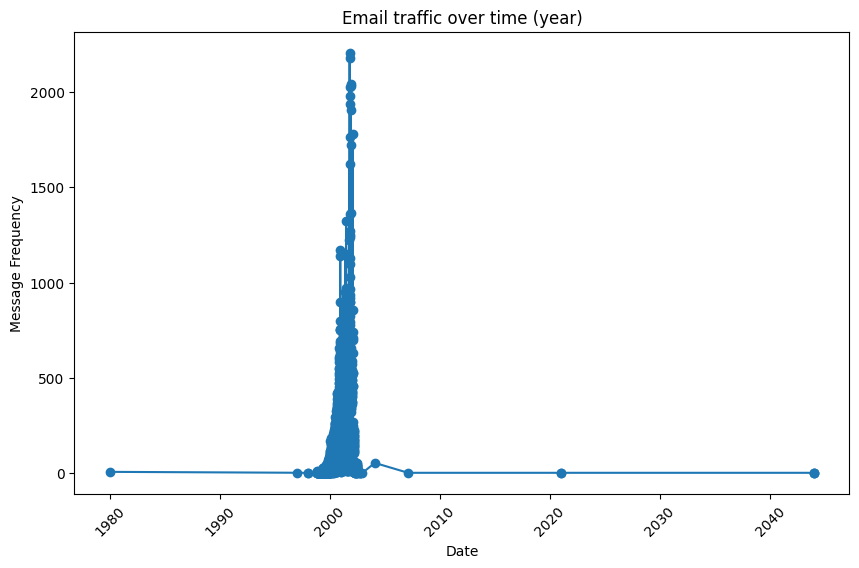

In [80]:
message_count = m_df.groupby(m_df['date'].dt.date).size().reset_index(name='count')

message_count.shape[0]

# Set the figure size
plt.figure(figsize=(10, 6))

# Plot the data as a line chart
plt.plot(message_count['date'], message_count['count'], marker='o')

# Set the labels and title
plt.xlabel('Date')
plt.ylabel('Message Frequency')
plt.title('Email traffic over time (year)')

# Rotate x-axis labels for better visibility if needed
plt.xticks(rotation=45)

# Display the plot
plt.show()

##TOP SENDERS AND RECIPIENTS

In [81]:
# for each row, count each messages a sender has sent and sort them by descending value
sender_count = m_df['sender'].value_counts().sort_values(ascending=False).reset_index()
# for each row, count each messages each recipient received and sort them by descending value
recipient_count = recipientinfo_df['rvalue'].value_counts().sort_values(ascending=False).reset_index()



# filter the senders and recipients to count only if the sender/recipient email is equal to the Email_id that shows up in the employeelist table
filtered_senders = sender_count[sender_count['index'].isin(employee_df['Email_id'])]
filtered_recipients = recipient_count[recipient_count['index'].isin(employee_df['Email_id'])]

# Plotting our results for top senders

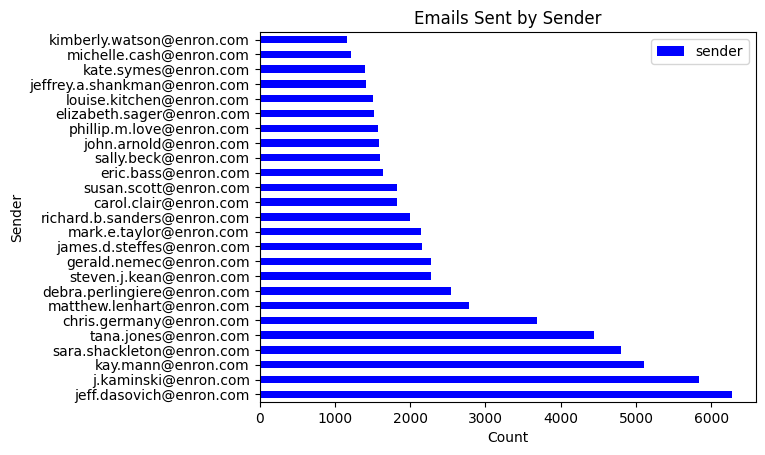

In [82]:
# Plotting the horizontal bar for top 25 senders
filtered_senders.head(25).plot.barh(y='sender', x='index', color='blue')

# Add labels and title
plt.xlabel('Count')
plt.ylabel('Sender')
plt.title('Emails Sent by Sender')

# Display the chart
plt.show()

#Plotting our results for top recipients

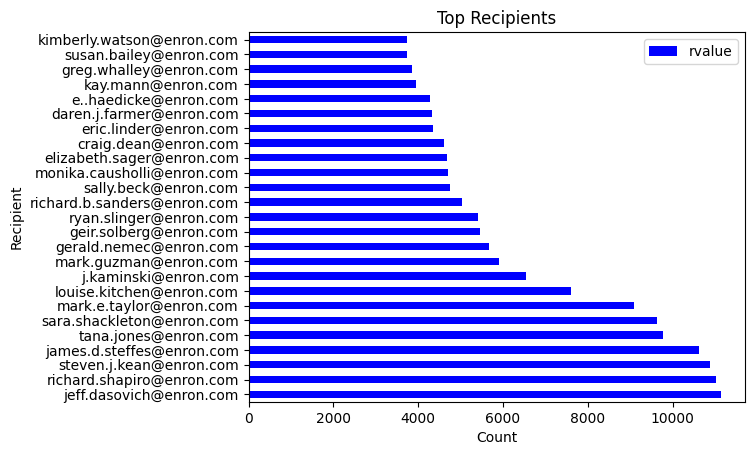

In [83]:
# Plotting the horizontal bar for top 25 recipients
filtered_recipients.head(25).plot.barh(y='rvalue', x='index', color='blue')

# Add labels and title
plt.xlabel('Count')
plt.ylabel('Recipient')
plt.title('Top Recipients')

# Display the chart
plt.show()

# Email distribution by by rtype

  index    rtype
0    TO  1556994
1    CC   253735
2   BCC   253713


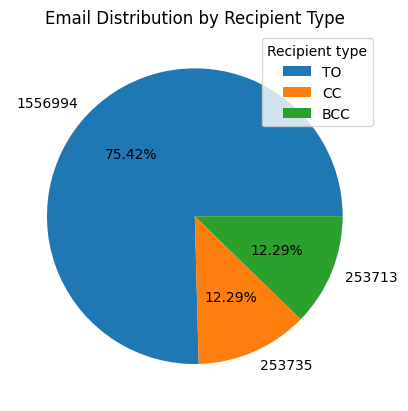

In [84]:
# count each 'to', 'cc', 'bcc' in the rtype column 
rtype_count = recipientinfo_df['rtype'].value_counts().reset_index()
print(rtype_count)

# Plot the results in a pie chart
rtype_labels = recipientinfo_df['rtype'].unique()
plt.pie(rtype_count.rtype, labels=rtype_count.rtype, autopct='%1.2f%%')
plt.legend(rtype_labels,title='Recipient type')
plt.title('Email Distribution by Recipient Type')
plt.show()

# Subject keyword analysis

In [87]:
# Code taken from:
# https://github.com/michael-borck/isys2001-worksheets/blob/main/visualise_twitter.ipynb
from google.colab import output
!curl -O https://raw.githubusercontent.com/michael-borck/isys2001-worksheets/main/stopwords.py
!pip install TextBlob
output.clear()
print('Downloaded the necessary files')


# Code taken from: 
# https://github.com/michael-borck/isys2001-worksheets/blob/main/twitter_data_cleaning.ipynb
# the clean function is used to extract human readable characters and filtering out unreadable data using regular expression
def clean(text):
  ''' Uses regular expresison to extract english letter and digits from the supplied text. '''
  regExp = "(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"
  return ' '.join(re.sub(regExp, " ", text).split())


Downloaded the necessary files


In [86]:
from wordcloud import WordCloud
# I tried 'from stopwords import ENGLISH_STOPW_WORDS
# but i keep getting AttributeError for ENGLISH_STOP_WORDS
# The file succesfully downloads in the project directory without issues and can be 
# found in the directorty using !ls, but it does not want to work
# alternatively I just copied the set from: 
# https://raw.githubusercontent.com/michael-borck/isys2001-worksheets/main/stopwords.py 
# in order to access ENGLISH_STOP_WORDS

ENGLISH_STOP_WORDS = set([
    'a',
    'about',
    'above',
    'across',
    'after',
    'afterwards',
    'again',
    'against',
    'ain',
    'all',
    'almost',
    'alone',
    'along',
    'already',
    'also',
    'although',
    'always',
    'am',
    'among',
    'amongst',
    'amoungst',
    'amount',
    'an',
    'and',
    'another',
    'any',
    'anyhow',
    'anyone',
    'anything',
    'anyway',
    'anywhere',
    'are',
    'aren',
    'around',
    'as',
    'at',
    'back',
    'be',
    'became',
    'because',
    'become',
    'becomes',
    'becoming',
    'been',
    'before',
    'beforehand',
    'behind',
    'being',
    'below',
    'beside',
    'besides',
    'between',
    'beyond',
    'bill',
    'both',
    'bottom',
    'but',
    'by',
    'call',
    'can',
    'cannot',
    'cant',
    'co',
    'con',
    'could',
    'couldn',
    'couldnt',
    'cry',
    'd',
    'de',
    'describe',
    'detail',
    'did',
    'didn',
    'do',
    'does',
    'doesn',
    'doing',
    'don',
    'done',
    'down',
    'due',
    'during',
    'each',
    'eg',
    'eight',
    'either',
    'eleven',
    'else',
    'elsewhere',
    'empty',
    'enough',
    'etc',
    'even',
    'ever',
    'every',
    'everyone',
    'everything',
    'everywhere',
    'except',
    'few',
    'fifteen',
    'fify',
    'fill',
    'find',
    'fire',
    'first',
    'five',
    'for',
    'former',
    'formerly',
    'forty',
    'found',
    'four',
    'from',
    'front',
    'full',
    'further',
    'get',
    'give',
    'go',
    'had',
    'hadn',
    'has',
    'hasn',
    'hasnt',
    'have',
    'haven',
    'having',
    'he',
    'hence',
    'her',
    'here',
    'hereafter',
    'hereby',
    'herein',
    'hereupon',
    'hers',
    'herself',
    'him',
    'himself',
    'his',
    'how',
    'however',
    'hundred',
    'i',
    'ie',
    'if',
    'in',
    'inc',
    'indeed',
    'interest',
    'into',
    'is',
    'isn',
    'it',
    'its',
    'itself',
    'just',
    'keep',
    'last',
    'latter',
    'latterly',
    'least',
    'less',
    'll',
    'ltd',
    'm',
    'ma',
    'made',
    'many',
    'may',
    'me',
    'meanwhile',
    'might',
    'mightn',
    'mill',
    'mine',
    'more',
    'moreover',
    'most',
    'mostly',
    'move',
    'much',
    'must',
    'mustn',
    'my',
    'myself',
    'name',
    'namely',
    'needn',
    'neither',
    'never',
    'nevertheless',
    'next',
    'nine',
    'no',
    'nobody',
    'none',
    'noone',
    'nor',
    'not',
    'nothing',
    'now',
    'nowhere',
    'o',
    'of',
    'off',
    'often',
    'on',
    'once',
    'one',
    'only',
    'onto',
    'or',
    'other',
    'others',
    'otherwise',
    'our',
    'ours',
    'ourselves',
    'out',
    'over',
    'own',
    'part',
    'per',
    'perhaps',
    'please',
    'put',
    'rather',
    're',
    's',
    'same',
    'see',
    'seem',
    'seemed',
    'seeming',
    'seems',
    'serious',
    'several',
    'shan',
    'she',
    'should',
    'shouldn',
    'show',
    'side',
    'since',
    'sincere',
    'six',
    'sixty',
    'so',
    'some',
    'somehow',
    'someone',
    'something',
    'sometime',
    'sometimes',
    'somewhere',
    'still',
    'such',
    'system',
    't',
    'take',
    'ten',
    'than',
    'that',
    'the',
    'their',
    'theirs',
    'them',
    'themselves',
    'then',
    'thence',
    'there',
    'thereafter',
    'thereby',
    'therefore',
    'therein',
    'thereupon',
    'these',
    'they',
    'thick',
    'thin',
    'third',
    'this',
    'those',
    'though',
    'three',
    'through',
    'throughout',
    'thru',
    'thus',
    'to',
    'together',
    'too',
    'top',
    'toward',
    'towards',
    'twelve',
    'twenty',
    'two',
    'un',
    'under',
    'until',
    'up',
    'upon',
    'us',
    've',
    'very',
    'via',
    'was',
    'wasn',
    'we',
    'well',
    'were',
    'weren',
    'what',
    'whatever',
    'when',
    'whence',
    'whenever',
    'where',
    'whereafter',
    'whereas',
    'whereby',
    'wherein',
    'whereupon',
    'wherever',
    'whether',
    'which',
    'while',
    'whither',
    'who',
    'whoever',
    'whole',
    'whom',
    'whose',
    'why',
    'will',
    'with',
    'within',
    'without',
    'won',
    'would',
    'wouldn',
    'y',
    'yet',
    'you',
    'your',
    'yours',
    'yourself',
    'yourselves'
])


# Cleaning subject text and plotting data in wordcloud

In [ ]:
# Code taken from:
# https://github.com/michael-borck/isys2001-worksheets/blob/main/visualise_twitter.ipynb


# Get all the email subjects and apply clean() retrieve only human readable text
df_clean = pd.DataFrame(columns=['Clean text'])
df_clean['Clean text'] = df_m['subject'].apply(clean)

# Get all the messages for each clean text and merge them into one string object for wordcloud
messages = ' '.join(df_clean['Clean text'])
wordcloud = WordCloud(width=680, height=480, margin=0,stopwords=ENGLISH_STOP_WORDS).generate(messages)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

# Internal vs. External Communication
1. Merge dataframes of messages and recipients by mid
2. filter the messages by extracting only senders and recipients from sender and rvalue column to match only with the column Email_id in the employee dataframe to get extract the internal communication
3. filter the messages in a similay way to step 2 by having either sender or rvalue not matching the Email_id column in employee dataframe
4. plot the results in a pie chart using the count the of all the rows in the internal comm. dataframe vs external comm. dataframe

2064182
69407
1994775


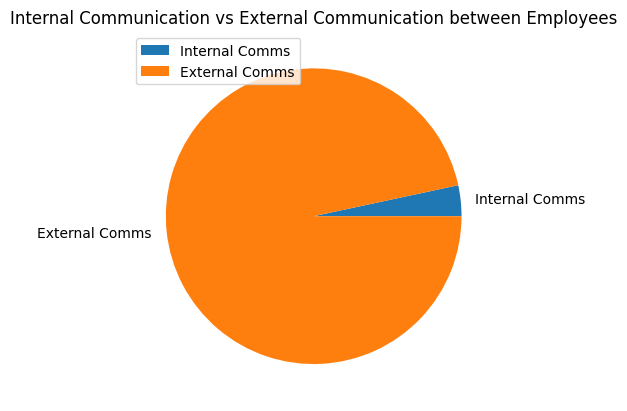

In [88]:
# Merge two dataframes from messages and recipientinfo table by message id
df_merged = m_df.merge(recipientinfo_df, on='mid')

# filter dataframe using isin() to retrieve rows with the sender and rvalue matching any emails in the employeelist 
df_internal_comm = df_merged[df_merged['sender'].isin(employee_df['Email_id']) & df_merged['rvalue'].isin(employee_df['Email_id'])]

# filter dataframe using ~isin() to retrieve rows with either sender or recipient 
# in the employeelist. Only one has to match for it to be an external comm
df_external_comm = df_merged[~df_merged['sender'].isin(employee_df['Email_id']) | ~df_merged['rvalue'].isin(employee_df['Email_id'])]

# check to see the number of internal and external emails
# make sure the internal + external emails add up to the total count df_merged rows
print(df_merged.shape[0])
print(df_internal_comm.shape[0])
print(df_external_comm.shape[0])

# total internal and external sum has to be equal to the number of mids 
assert df_internal_comm.shape[0] + df_external_comm.shape[0] == df_merged.shape[0], "'The sum of internal and external emails should be equal to the number of emails in the df_merged list'"

# Plot our result on a pie graph
label = ['Internal Comms', 'External Comms']
values = [df_internal_comm.shape[0],df_external_comm.shape[0]]
plt.pie(values,labels=label)
plt.title('Internal Communication vs External Communication between Employees')
plt.legend()
plt.show()